# Sentiment analysis of Amazon Food reviews 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk

In [89]:
# Loading Datasets
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Reviews.csv\Reviews.csv")
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [90]:
df.shape

(568454, 10)

In [91]:
df= df.head(1000)

##  Data preprocessing
-  Tokenization:
- Lowercasing:
- Removing stop Words
- Stemming and lemmatization:
- Removing puntuation and special Characters:


> ###  Tokenization: This is the process of breaking the text into individual words or phrases. 

### Word Frequency Distribution

In [92]:
from nltk.tokenize import word_tokenize

In [93]:
#Basic nltk
example = df['Text'][100]
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [94]:
tokens=nltk.word_tokenize(example)
tokens

['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the',
 'ways',
 '...',
 "''",
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'like',
 'apple',
 'products',
 'a',
 'must',
 'have',
 'item',
 '.',
 'The',
 'only',
 'draw',
 'back',
 ',',
 'shipping',
 'cost',
 '.',
 'These',
 'are',
 'very',
 'heavy',
 '.']

In [95]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
# Tokenizing evvery text in amazon food review

In [97]:
reviews = df['Text']

In [98]:
tokens=[]
for Text in reviews:
    words=word_tokenize(Text)
    tokens.extend(words)
print(tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.', 'Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', '.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '``', 'Jumbo', "''", '.', 'This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', '.', 'It', 'is', 'a', 'light', ',', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', '-', 'in', 'this', 'case', 'Filberts', '.', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares'

> ### Removing stop words
- This is the process where we remove words which has less meaning eg, "the","is","are" etc

In [99]:
from nltk.corpus import stopwords

In [100]:
stopwords = set(stopwords.words("english"))
filtered_tokens= [word for word in tokens if word.lower() not in stopwords]

> ### Stemming or lemmatization
- In this process it reduces the word which carry the same meaning but have different forms are counted as same words
 

In [101]:
from nltk.stem import PorterStemmer

In [102]:
stemmer = PorterStemmer()
stemmed_tokens=[word.lower() for word in filtered_tokens]

> ### Removing punctuation marks

In [103]:
# Remove punctuation marks
import string

punctuation_marks = string.punctuation
filtered_tokens_without_punctuation = [word.lower().translate(str.maketrans("", "", punctuation_marks)) for word in tokens if word.lower() not in stopwords]


In [104]:
filtered_tokens_without_punctuation =  [token.strip() for token in filtered_tokens_without_punctuation]

In [105]:
filtered_tokens_without_punctuation = [token for token in filtered_tokens_without_punctuation if token.strip()]

> ## Word frequency distribution

In [106]:
from collections import Counter

In [107]:
word_frequency = Counter(filtered_tokens_without_punctuation)

In [108]:
word_frequency

Counter({'bought': 88,
         'several': 28,
         'vitality': 1,
         'canned': 9,
         'dog': 47,
         'food': 217,
         'products': 49,
         'found': 94,
         'good': 321,
         'quality': 75,
         'product': 209,
         'looks': 16,
         'like': 412,
         'stew': 2,
         'processed': 4,
         'meat': 15,
         'smells': 6,
         'better': 122,
         'labrador': 1,
         'finicky': 3,
         'appreciates': 1,
         'arrived': 31,
         'labeled': 2,
         'jumbo': 2,
         'salted': 11,
         'peanuts': 13,
         'actually': 48,
         'small': 57,
         'sized': 12,
         'unsalted': 10,
         'sure': 55,
         'error': 2,
         'vendor': 5,
         'intended': 1,
         'represent': 1,
         'confection': 1,
         'around': 36,
         'centuries': 1,
         'light': 27,
         'pillowy': 1,
         'citrus': 4,
         'gelatin': 1,
         'nuts': 5,
         'c

In [109]:
def remove_one_or_two_char_tokens(filtered_tokens_Without_punctuation):
    return [token for token in filtered_tokens_Without_punctuation if len(token) > 2]

In [110]:
filtered_tokens_without_punctuation = remove_one_or_two_char_tokens(filtered_tokens_without_punctuation)

In [111]:
filtered_tokens_without_punctuation

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 'product',
 'arrived',
 'labeled',
 'jumbo',
 'salted',
 'peanuts',
 'peanuts',
 'actually',
 'small',
 'sized',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 'jumbo',
 'confection',
 'around',
 'centuries',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'nuts',
 'case',
 'filberts',
 'cut',
 'tiny',
 'squares',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 'tiny',
 'mouthful',
 'heaven',
 'chewy',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'familiar',
 'story',
 'lewis',
 'lion',
 'witch',
 'wardrobe',
 'treat',
 'seduces',
 'edmund',
 'selling',
 'brother',
 'sisters',
 'witch',
 'looking',
 'secret',
 'ingredient',
 'robitussin',
 'believe',
 'found',
 'got',
 'addition',
 '

In [112]:
from nltk.probability import FreqDist

In [113]:
fdist = FreqDist(filtered_tokens_without_punctuation)

In [114]:
print(fdist.most_common(10))

[('chips', 562), ('like', 412), ('good', 321), ('great', 285), ('taste', 283), ('flavor', 277), ('one', 269), ('love', 218), ('food', 217), ('product', 209)]


> ## EDA

Text(0.5, 0, 'Review stars')

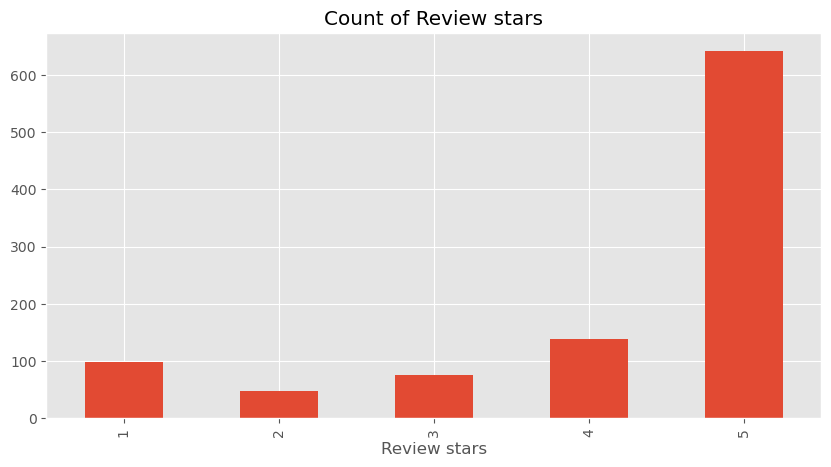

In [115]:
# quick Eda
ax= df.Score.value_counts().sort_index(). plot(kind='bar',
                                          title='Count of Review stars',
                                          figsize=(10,5))
ax.set_xlabel("Review stars")

> ## Word Cloud

In [116]:
from wordcloud import WordCloud

In [117]:
all_tokens_string = " ".join(filtered_tokens_without_punctuation)

In [118]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tokens_string)

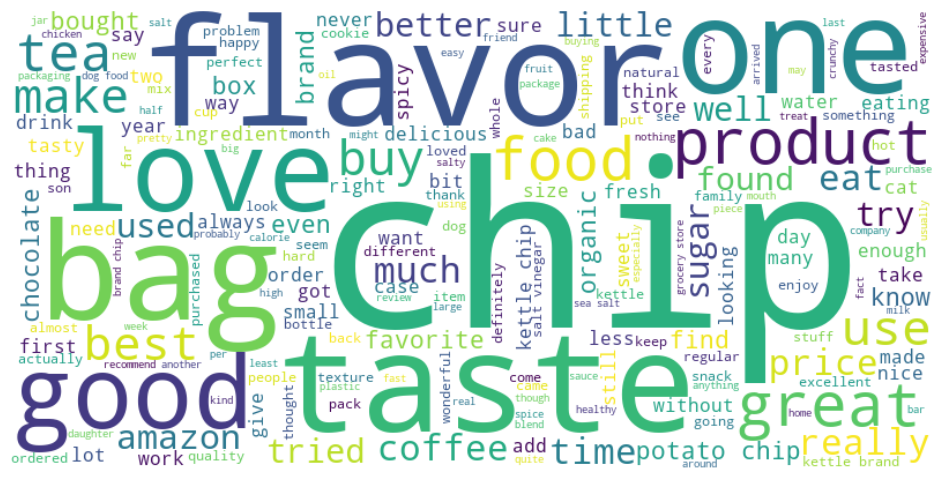

In [167]:
# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ## Bar Plot

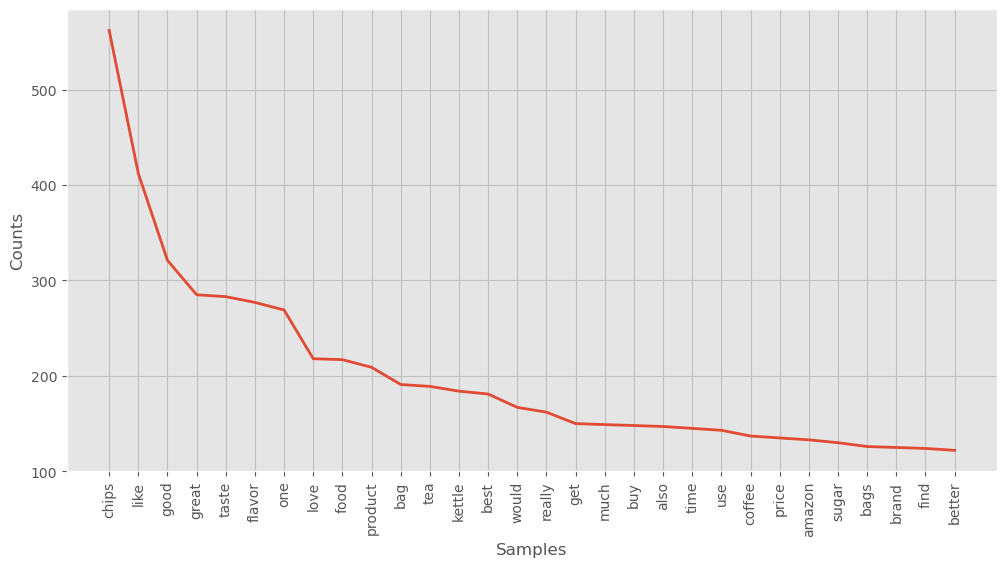

In [120]:
# Plot the frequency distribution using matplotlib's bar function
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.show()

> ## Sentiment Distribution

In [121]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Vader Sentiment scoring

In [122]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [123]:
Text

'I have to admit, I was a sucker for the large quantity, 12 oz, when shopping for hot sauces ...but now seeing the size of the bottle, it reminds of wing-sauce bottle sizes.  Plastic bottle.  It does have a convenient squirt top.  But overall, not very hot or tasty, and made mostly from jalape&ntilde;os.  If I had seen the ingredients list I would not have bought it:<br />Jalapenos<br />Water<br />Vinegar<br />Brown Sugar<br />Lime Juice<br />Fish Sauce<br />Cilantro<br />Habanero<br />Garlic<br />Spice Blend<br />Salt<br />Potassium Sorbate<br />Xanthan Gum'

In [124]:
sia.polarity_scores(Text)

{'neg': 0.027, 'neu': 0.939, 'pos': 0.034, 'compound': -0.1027}

In [125]:
# Run the polarity score on the entire datasets
for i in tqdm(df.iterrows(), total=len(df)):
    text = i[1]['Text']
    myid = i[1]['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [126]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [127]:
vaders = pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [128]:
vaders.head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


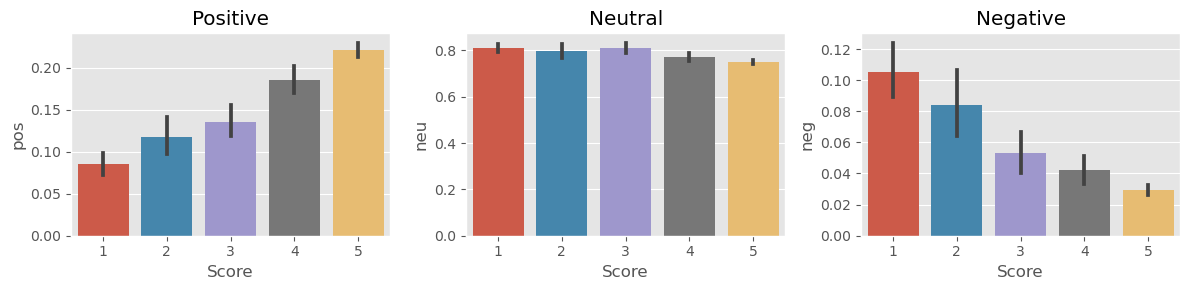

In [129]:
fig , axs =plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

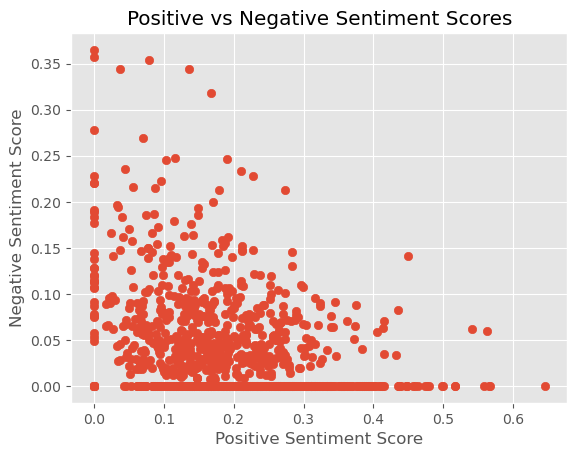

In [164]:
plt.scatter(vaders['pos'], vaders['neg'])
plt.title('Positive vs Negative Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Negative Sentiment Score')
plt.show()

In [171]:
product_counts = df['ProductId'].value_counts()
top_products = product_counts.head(10)

In [173]:
top_products

B000G6RYNE    217
B000G6MBX2     52
B000ER6YO0     49
B002BCD2OG     20
B000HDMUQ2     20
B001EO5QW8     19
B001UJEN6C     19
B0019CW0HE     17
B0028C44Z0     16
B000VKYKTG     16
Name: ProductId, dtype: int64

# The Transformers Pipeline

In [153]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_357']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [155]:
review_text = "This product was great! I loved it so much!"
sentiment_prediction = sent_pipeline(review_text)[0]

In [156]:
print(f"Sentiment: {sentiment_prediction['label']}")
print(f"Confidence score: {sentiment_prediction['score']}")

Sentiment: POSITIVE
Confidence score: 0.9998785257339478
